In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Sydney_Data.csv')
print(data.shape)

# Selecting top 1.5k rows
data = data[:1500]
print(data.shape)
column_names = [f'X{i}' for i in range(1, 17)] + [f'Y{i}' for i in range(1, 17)] + [f'P{i}' for i in range(1, 17)] + ['Power_Output']

# Assign the new column names to the DataFrame
data.columns = column_names

# os.listdir('/kaggle/input')
# ['Sydney_Data.csv', 'Perth_Data.csv', 'Adelaide_Data.csv', 'Tasmania_Data.csv']


(71999, 49)
(1500, 49)


In [7]:
sample_data = data.sample(1500)
cat_columns = sample_data.select_dtypes(object).columns.to_list()
print(cat_columns)
print()
num_columns = sample_data.select_dtypes(np.number).columns.to_list()
print(num_columns)

[]

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'Power_Output']


In [8]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
data = pd.DataFrame(s.fit_transform(data), index= data.index, columns= data.columns)

In [9]:
data.head(500)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_Output
0,0.884219,0.492314,0.083757,0.737395,0.974750,0.708798,0.000000,0.285826,0.650449,0.081246,...,0.247542,0.527570,0.576987,0.748948,0.669718,0.337721,0.588907,0.601847,0.445234,0.746667
1,0.904154,0.184520,1.000000,0.672099,0.611058,0.000000,0.159998,0.012880,1.000000,1.000000,...,0.495918,1.000000,0.826584,0.788502,0.224213,0.773791,0.558523,0.781967,0.287446,0.786538
2,0.034804,0.382399,0.627731,0.119815,0.916476,0.127486,0.393628,0.395626,1.000000,0.552027,...,0.519150,0.870539,0.177001,0.547831,0.951893,0.830582,0.747958,0.660562,0.132340,0.513933
3,0.000000,0.000000,0.429933,0.000000,1.000000,0.000000,0.350685,0.000000,1.000000,1.000000,...,0.324710,0.729468,0.681132,0.645245,0.261107,0.658066,0.437024,0.603226,0.333707,0.637278
4,0.789154,0.743881,0.871360,1.000000,0.912327,1.000000,1.000000,0.838899,1.000000,0.000000,...,0.450542,0.960007,0.355868,0.685862,0.267396,0.653196,0.640983,0.346929,0.424911,0.719558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.000000,0.414072,0.000000,0.291638,0.649690,0.687806,0.000000,0.136199,0.272899,0.301583,...,0.791768,0.430882,0.207819,0.934047,0.460055,0.540770,0.500313,0.551102,0.467900,0.671716
496,0.952003,0.480868,0.000000,0.159562,0.509720,0.862850,0.000000,0.207759,0.210932,0.497412,...,0.442225,0.237017,0.384129,0.797532,0.568116,0.703873,0.691725,0.368779,0.515406,0.732975
497,0.608939,0.494338,0.187486,0.000000,1.000000,0.950740,0.000000,0.015227,0.202231,0.759245,...,0.411798,0.373595,0.554045,0.966499,0.851816,0.612216,0.468045,0.533278,0.424749,0.667437
498,0.858005,0.655644,0.242959,0.000000,0.912026,1.000000,0.113360,0.045660,0.166296,0.687358,...,0.500257,0.242361,0.405618,0.746785,0.820402,0.947508,0.553160,0.310796,0.560730,0.808755


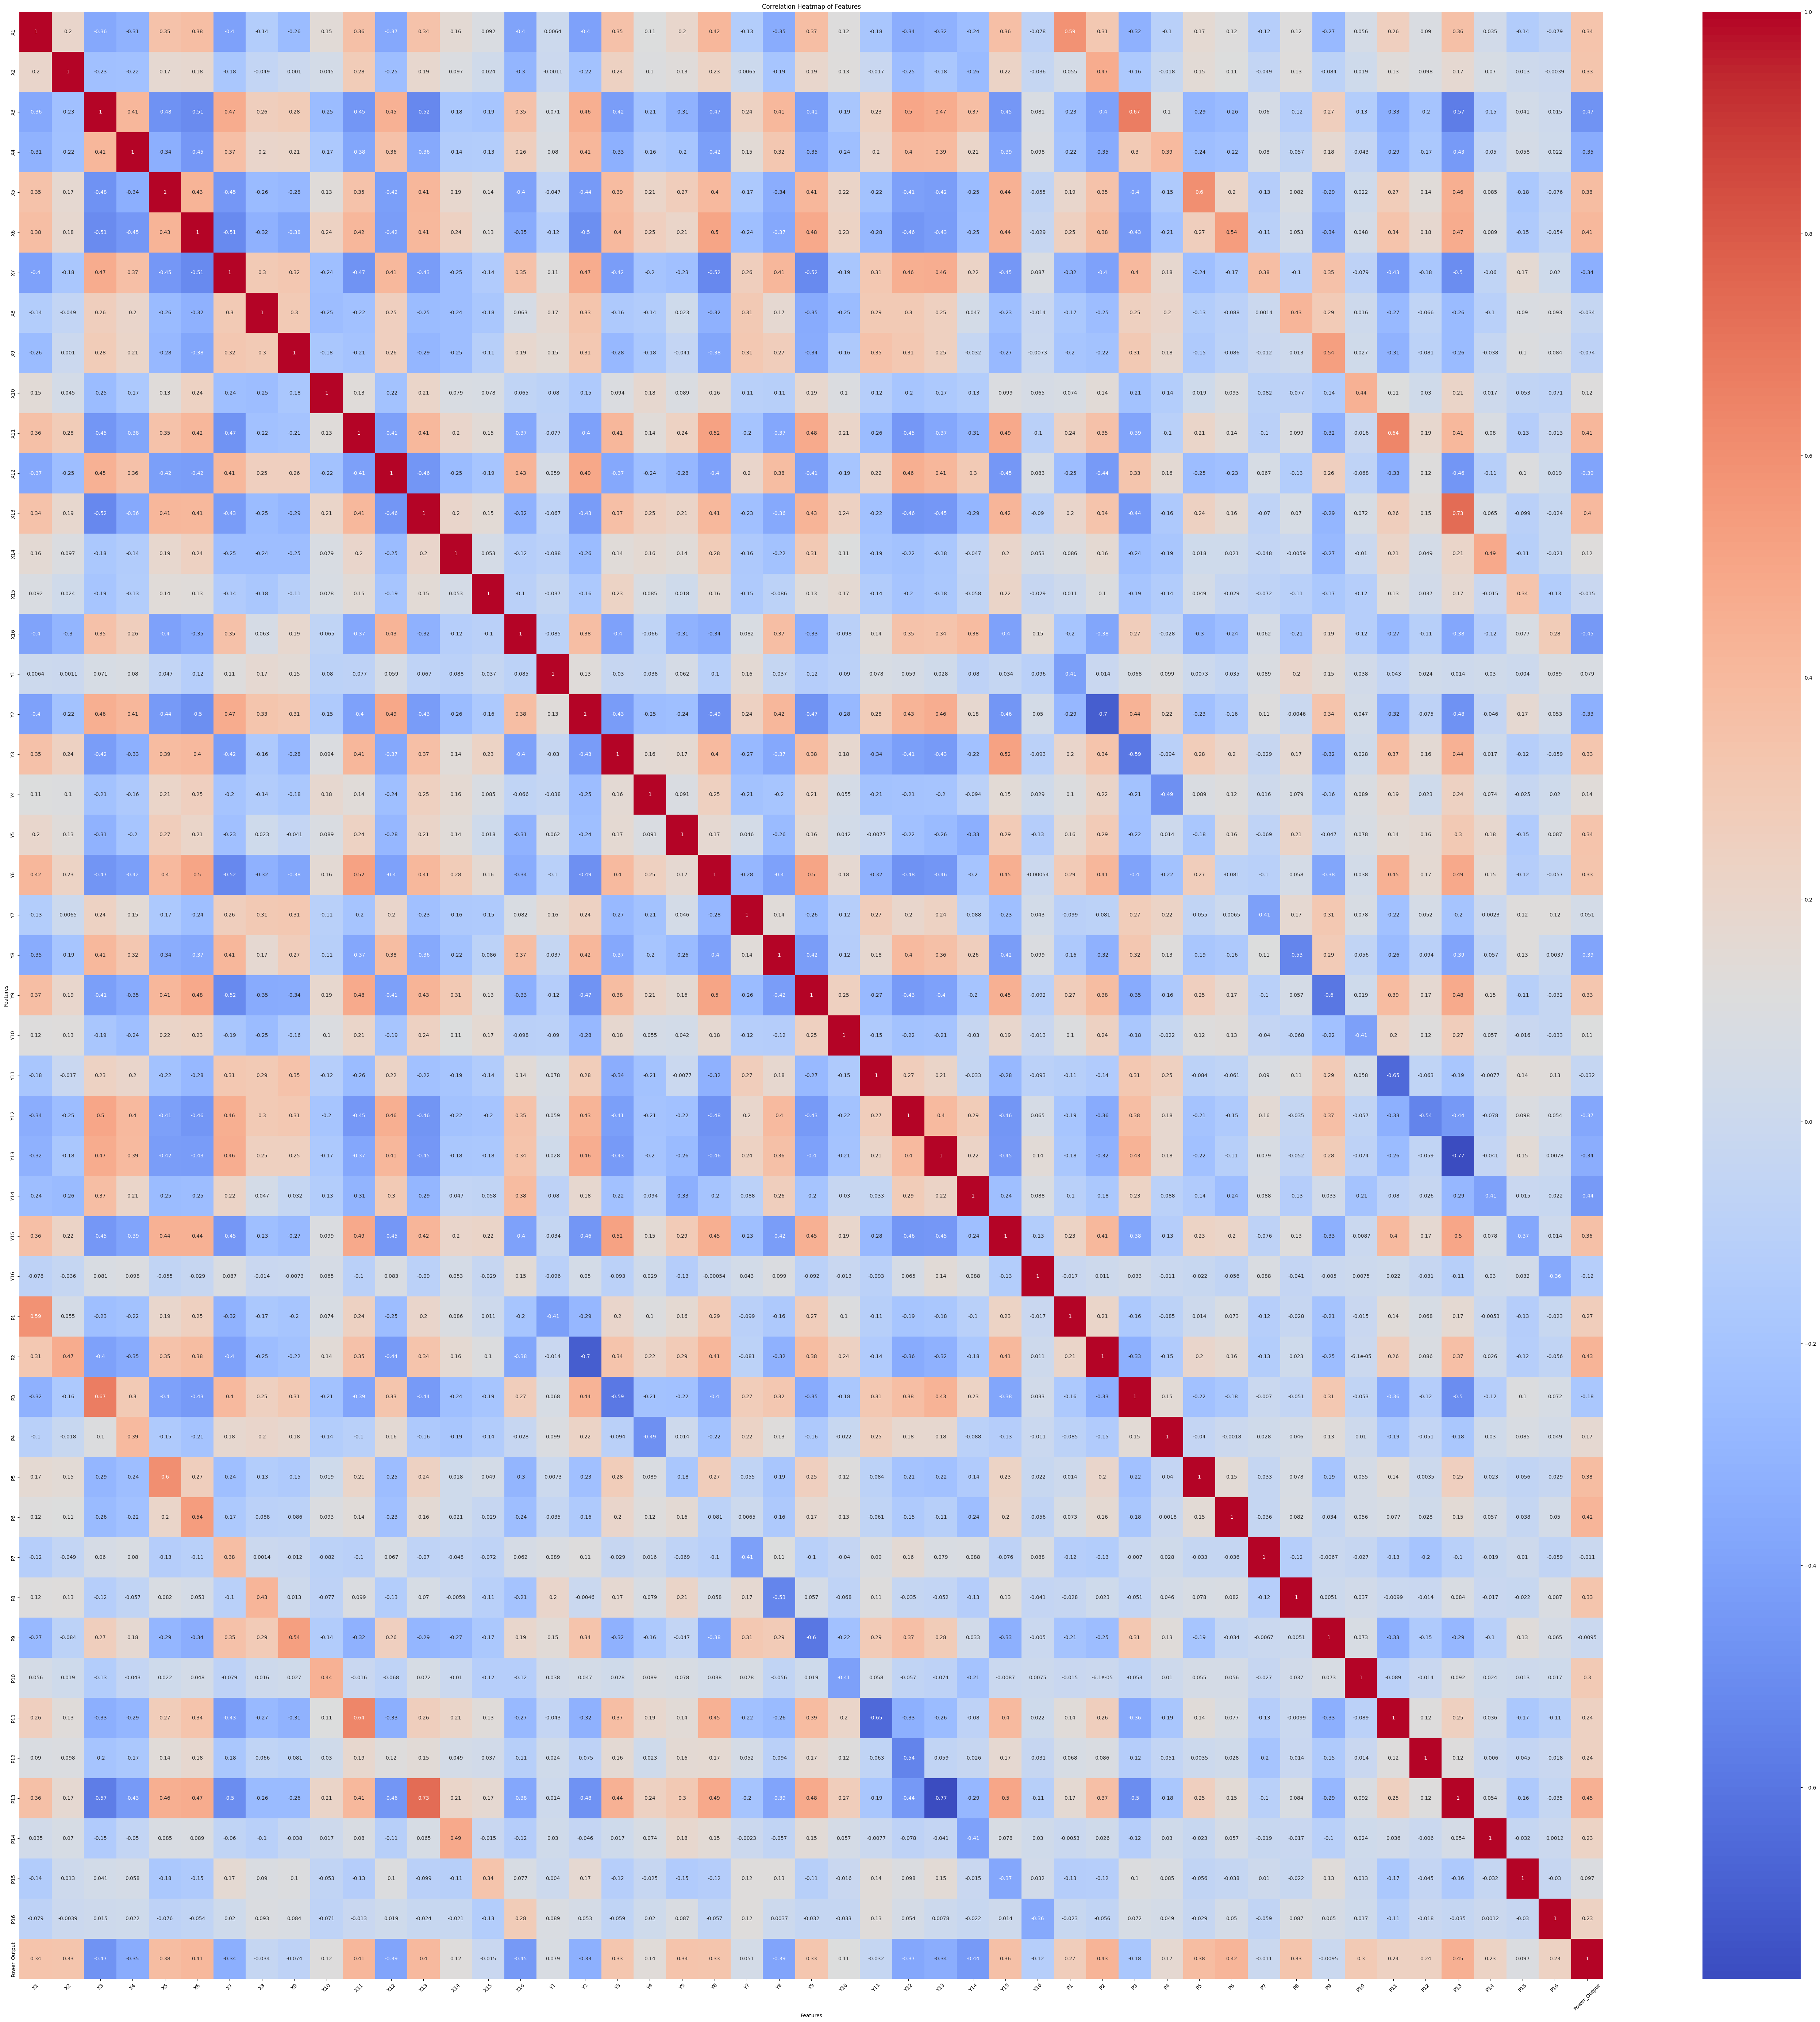

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = data.corr()

plt.figure(figsize=(70, 70))

sns.heatmap(correlation, annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap of Features")
plt.xlabel("Features")
plt.ylabel("Features")

plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]  # Assuming the target variable is the last column
y = data.iloc[:, -1]   # Assuming the target variable is the last column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for each model
param_grids = {
    "Linear Regression": {},
    "Decision Tree": {"max_depth": [None, 5, 10, 15]},
    "Random Forest": {"n_estimators": [100, 200, 300], "max_depth": [None, 5, 10, 15]},
    "Support Vector Machine": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7]}
}

# Perform GridSearchCV for each model
best_models = {}

for model_name, model in models.items():
    print("Tuning hyperparameters for", model_name)
     # Create GridSearchCV instance
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring="neg_mean_squared_error", cv=5)

    # Fit the GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Save the best model and its parameters
    best_models[model_name] = {"model": best_model, "params": best_params}

    # printing the best parameters and best score
    print("Best parameters:", best_params)
    print("Best score:", grid_search.best_score_)


Tuning hyperparameters for Linear Regression
Best parameters: {}
Best score: -6.353158000141626e-18
Tuning hyperparameters for Decision Tree
Best parameters: {'max_depth': 5}
Best score: -0.011693333841220505
Tuning hyperparameters for Random Forest
Best parameters: {'max_depth': 15, 'n_estimators': 100}
Best score: -0.005810842328118147
Tuning hyperparameters for Support Vector Machine
Best parameters: {'C': 1, 'kernel': 'linear'}
Best score: -0.003287475473426916
Tuning hyperparameters for K-Nearest Neighbors
Best parameters: {'n_neighbors': 7}
Best score: -0.011121424309518653


In [ ]:
# rmse_scores = {}

# best_model_name = None
# best_rmse = np.inf

# for model_name, model_data in best_models.items():
#     model = model_data["model"]
#     params = model_data["params"]

#     print("Evaluating", model_name)
#     print("Best parameters:", params)

#     # Fit the model with best parameters
#     model.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = model.predict(X_test)

#     # Evaluate the model's performance
#     # Calculate RMSE
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     rmse_scores[model_name] = rmse

#     print("Root Mean Squared Error:", rmse)
#     print()

#     if rmse < best_rmse:
#         best_model_name = model_name
#         best_rmse = rmse

# print("Best Model:", best_model_name)

rmse_scores = {}

best_rmse_name = None
best_mae_name = None
best_r2_name = None

best_rmse = np.inf
best_mae = np.inf
best_r2 = 0

for model_name, model_data in best_models.items():
    model = model_data["model"]
    params = model_data["params"]

    print("Evaluating", model_name)
    print("Best parameters:", params)

    # Fit the model with best parameters
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[model_name] = rmse

    print("Root Mean Squared Error:", rmse)
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error:", mae)
    r2 = r2_score(y_test, y_pred)
    print("R-squared:", r2)
    print()

    if rmse < best_rmse:
        best_rmse_name = model_name
        best_rmse = rmse
    if mae < best_mae:
        best_mae_name = model_name
        best_mae = mae
    if r2 > best_r2:
        best_r2_name = model_name
        best_r2 = r2

print("Best Model (from RMSE):", best_rmse_name)
print("Best Model (from MAE):", best_mae_name)
print("Best Model (from R-squared):", best_r2_name)
print()
if (best_rmse_name == best_mae_name and best_mae_name == best_r2_name and best_r2_name == best_rmse_name):
  best_model_name = best_rmse_name
  print("The best model is: ",best_model_name)


Evaluating Linear Regression
Best parameters: {}
Root Mean Squared Error: 2.319586500903046e-09
Mean Absolute Error: 1.9523054299123523e-09
R-squared: 0.9999999999999998

Evaluating Decision Tree
Best parameters: {'max_depth': 5}
Root Mean Squared Error: 0.10970214990032612
Mean Absolute Error: 0.07764705078891392
R-squared: 0.4074315850479151

Evaluating Random Forest
Best parameters: {'max_depth': 15, 'n_estimators': 100}
Root Mean Squared Error: 0.0767322607422486
Mean Absolute Error: 0.054171357097135636
R-squared: 0.7100893235886208

Evaluating Support Vector Machine
Best parameters: {'C': 1, 'kernel': 'linear'}
Root Mean Squared Error: 0.05367243208882113
Mean Absolute Error: 0.04551797503888752
R-squared: 0.8581560647048349

Evaluating K-Nearest Neighbors
Best parameters: {'n_neighbors': 7}
Root Mean Squared Error: 0.09961233973464531
Mean Absolute Error: 0.07241892457800847
R-squared: 0.5114213292261676

Best Model (from RMSE): Linear Regression
Best Model (from MAE): Linear Re

In [ ]:

# Make predictions on the test set with the best model
best_model = best_models[best_model_name]["model"]
y_pred = best_model.predict(X_test)

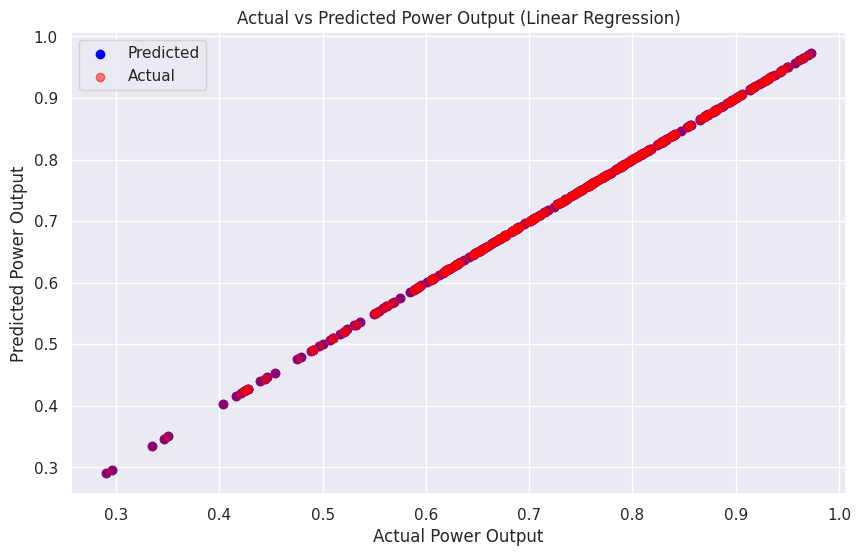

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Scatterplot: Actual vs Predicted Power Output
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Power Output')
plt.ylabel('Predicted Power Output')
plt.title(f'Actual vs Predicted Power Output ({best_model_name})')
plt.legend()
plt.grid(True)
plt.show()


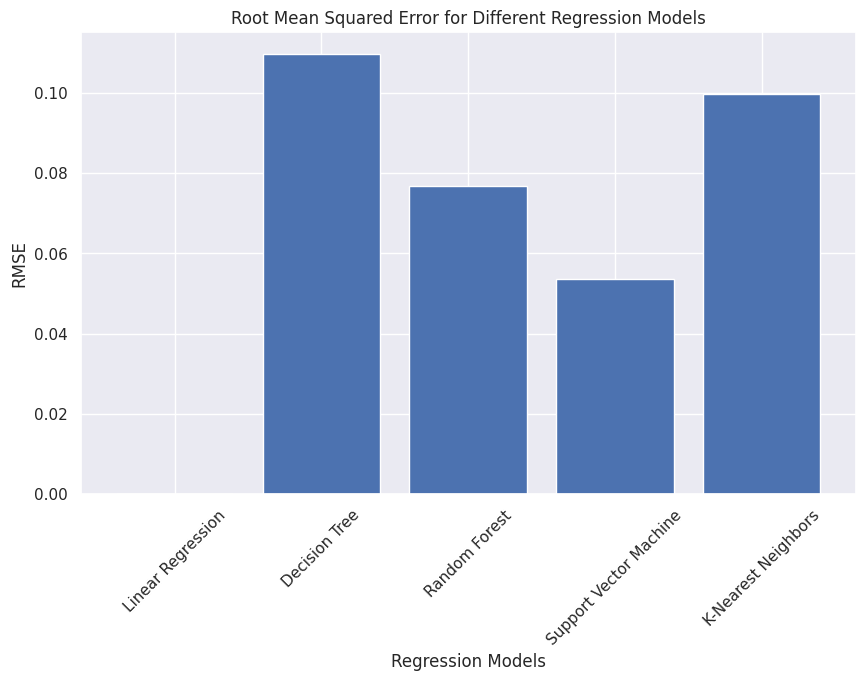

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(rmse_scores.keys(), rmse_scores.values())
plt.xlabel("Regression Models")
plt.ylabel("RMSE")
plt.title("Root Mean Squared Error for Different Regression Models")
plt.xticks(rotation=45)
plt.show()